<a href="https://colab.research.google.com/github/ericlrf/desafio-cientista-de-dados/blob/main/Eric_Luiz__Rodrigues_de_Franca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

Importar dependencias/bibliotecas

---



In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 25.9 MB 694 kB/s
     |████████████████████████████████| 10.9 MB 12.0 MB/s 
     |████████████████████████████████| 596 kB 54.6 MB/s 
     |████████████████████████████████| 102 kB 10.8 MB/s 
     |████████████████████████████████| 687 kB 59.8 MB/s 
     |████████████████████████████████| 4.7 MB 60.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 78.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=4d31986437bf719b865b43bcd0db7dc5e9eb7db1923138c586a5e38755c51c9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-138i42jq/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b953d52ceeacd6325245f74f4c474302fafb8057e7b77dbcf402456d73cbf4cb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [ ]:
from pandas_profiling import ProfileReport



---

Extração e Transformação do dataset (incluindo analise exploratoria)

---



In [ ]:
from sklearn.datasets import load_boston

bostonDataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(bostonDataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(bostonDataset.data[0])  
print("shape : ", bostonDataset.data.shape)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
shape :  (506, 13)


In [ ]:
print(bostonDataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
boston = pd.DataFrame(bostonDataset.data, columns=bostonDataset.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [ ]:
boston['Price'] = bostonDataset.target

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
print("Shape: ",boston.shape) 

Shape:  (506, 14)


In [ ]:
boston.isnull().values.any()

False

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB




---

Estatística descritiva dos dados;

---



In [ ]:
#Síntese estatística 
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# Tabela de frequência
profile = ProfileReport(df=boston, title="Boston Housing Dataset", explorative=True, dark_mode=True, minimal=False)
profile.to_notebook_iframe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


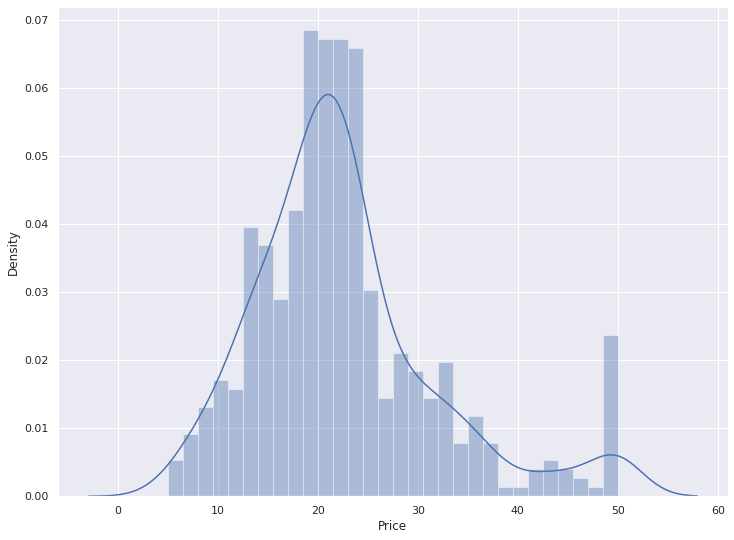

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(boston['Price'], bins=30)
plt.show()

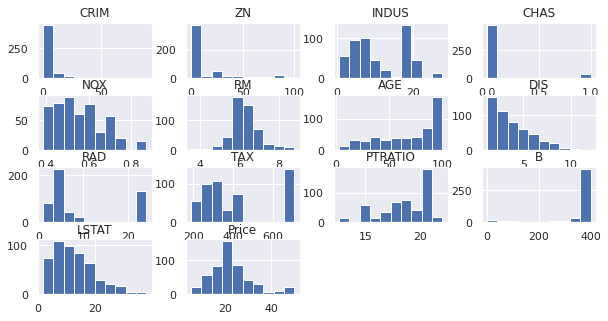

In [ ]:
# Histograma
boston.hist(figsize=(10, 5))
plt.show()



---

Analise univariada (Skewness e Kurtosis)

---



In [ ]:
# Skewness 
print(
    # stats.kurtosis(boston, bias=False), pd.DataFrame(boston).kurtosis()[0],
    stats.skew(boston, bias=False), pd.DataFrame(boston).skew()[0],
    sep='\n'
)

[ 5.2231488   2.22566632  0.29502157  3.40590417  0.72930792  0.40361213
 -0.59896264  1.01178058  1.00481465  0.66995594 -0.80232493 -2.89037371
  0.90646009  1.10809841]
5.223148798243851


In [ ]:
# Kurtosis
import scipy.stats as stats
print(
    stats.kurtosis(boston, bias=False), pd.DataFrame(boston).kurtosis()[0],
    # stats.skew(boston, bias=False), pd.DataFrame(boston).skew()[0],
    sep='\n'
)

[37.13050913  4.03151008 -1.2335396   9.63826378 -0.06466713  1.89150037
 -0.96771559  0.48794112 -0.86723199 -1.14240799 -0.28509138  7.22681755
  0.49323952  1.49519694]
37.13050912952203




---

Análise de dados multivariada

---



In [ ]:
#  Matriz de dispersão em pares
sns.set_theme(style="ticks")

sns.pairplot(boston)#, hue="Price")

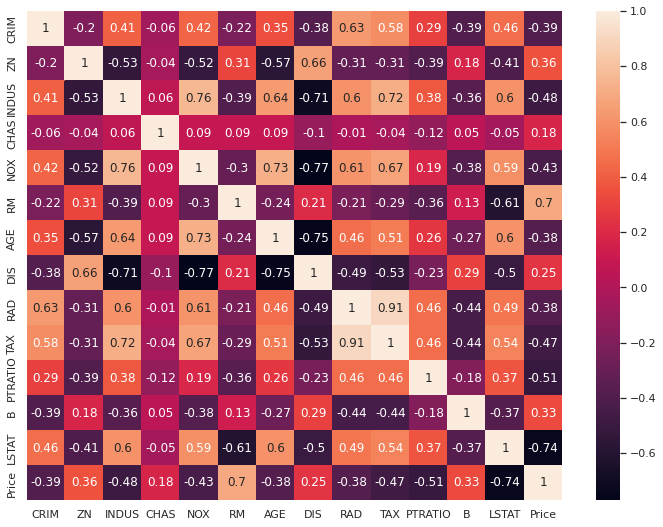

In [ ]:
# Matriz de correlação
correlationMatrix = boston.corr().round(2)
sns.heatmap(data=correlationMatrix, annot=True)



---

Análise bivariada

---



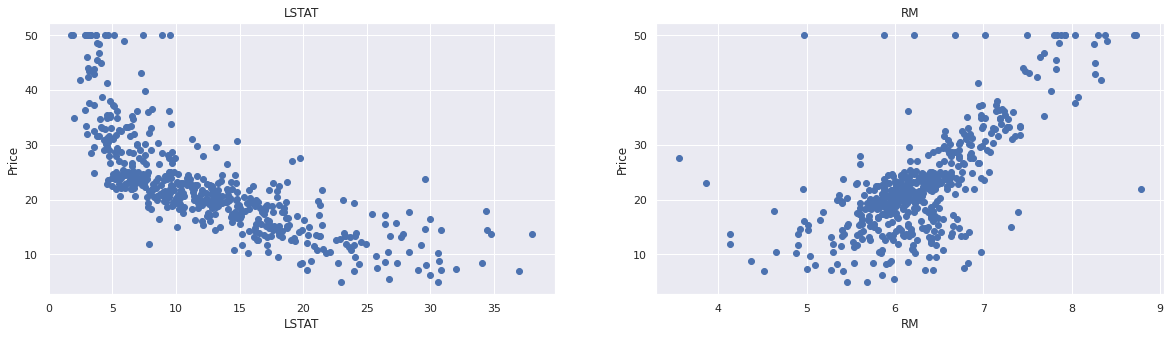

In [ ]:
# Grafico de dispersão
plt.figure(figsize=(20, 5))
 
features = ['LSTAT', 'RM']
target = boston['Price']
 
for j, column in enumerate(features):
    plt.subplot(1, len(features) , j+1)
    x = boston[column]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Price')



---

As 5 Suposições Principais da Regressão

---



>1. Linear Relationship;

In [33]:
import matplotlib

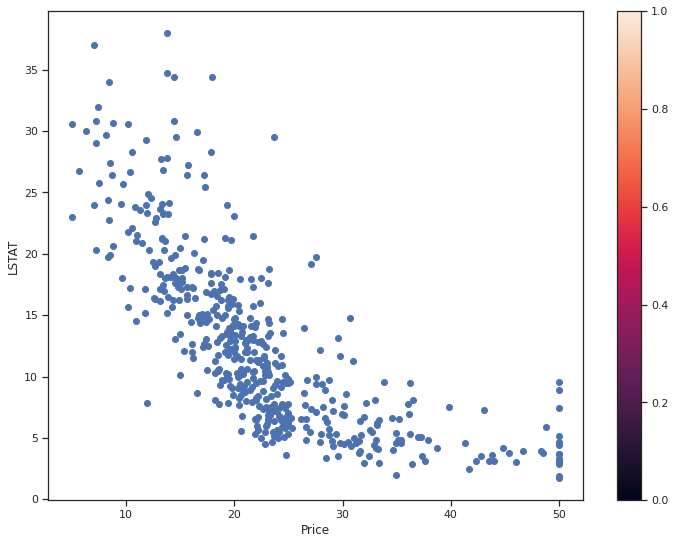

In [39]:
plt.scatter(boston['Price'], boston['LSTAT'], cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('LSTAT')
plt.show()

>3. No or little multicollinearity;


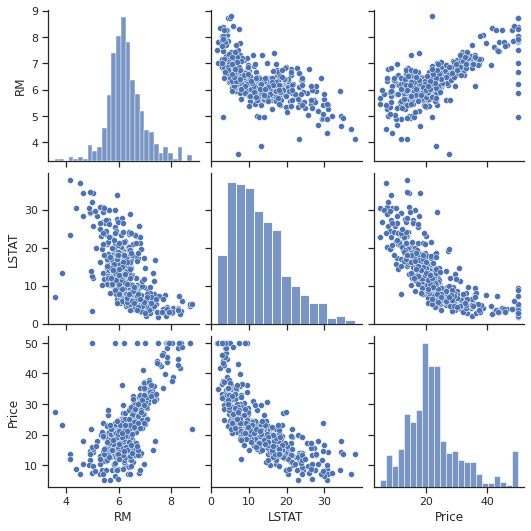

In [44]:
sns_plot = sns.pairplot(boston.iloc[:,[5,12,13]])

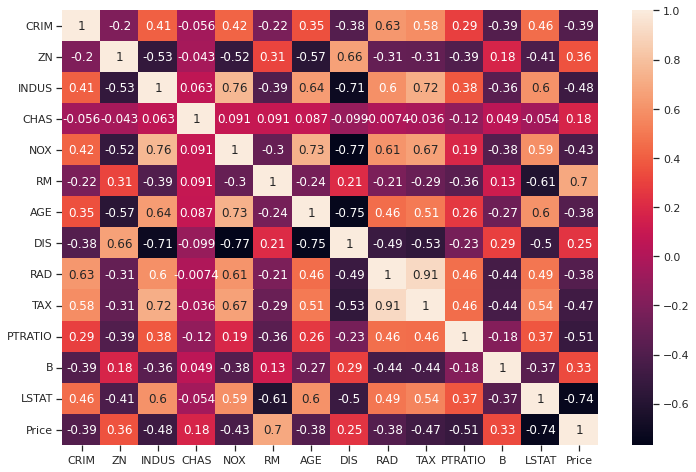

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(boston.corr(), annot=True)



---

Gerar modelo de regressão (incluindo avaliação do modelo)

---



In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

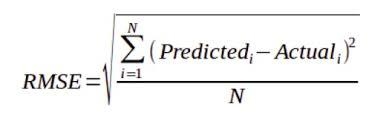

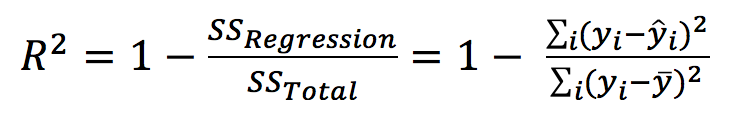

In [ ]:
predicted_y_train = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, predicted_y_train)))
r2 = r2_score(Y_train, predicted_y_train)
 
print("The model's training set performance :-")
print('RMSE is : {}'.format(rmse))
print('R2 score is : {}'.format(r2))
print("--------------------------------------")
 
# model evaluation for Test set
 
predicted_y_test = regressor.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, predicted_y_test)))
 
# r-squared score of the model
r2 = r2_score(Y_test, predicted_y_test)
 
print("The model's testing set performance")
print('RMSE is : {}'.format(rmse))
print('R2 score is : {}'.format(r2))
print("--------------------------------------")

The model's training set performance :-
RMSE is : 5.6371293350711955
R2 score is : 0.6300745149331701
--------------------------------------
The model's testing set performance
RMSE is : 5.137400784702911
R2 score is : 0.6628996975186952
--------------------------------------


>2. Multivariate normality;


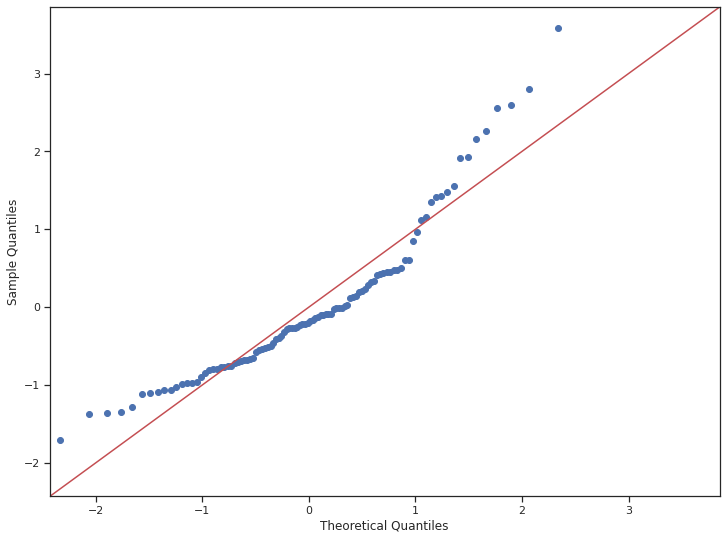

<Figure size 864x576 with 0 Axes>

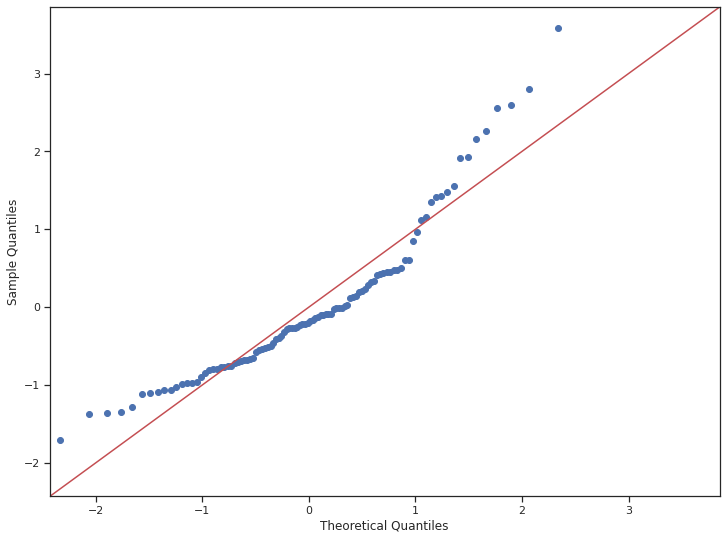

In [51]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(12,8))
residue = (Y_test - predicted_y_test)
qqplot(residue, line='45', fit='True')

>4. No auto-correlation;

In [ ]:
for col in boston.columns[:-1]:
  plt.figure(figsize=(12,8))
  plt.scatter(x=boston[col], y = (Y_test-predicted_y_test))
  plt.xlabel(col)
  plt.ylabel('Residuals')
  plt.show()


>5. Homoscedasticity.

In [ ]:
plt.figure(figsize=(12,8))
coefficients = regressor.coef_
intercept = regressor.intercept_
fitted_y = np.zeros((X_test.shape[0],1))
for i in range(X_test[i:],(regressor.coef_).T)

>>É possível afirmar que um modelo de regressão linear no conjunto de dados de Boston viola o número de suposições que causam problemas significativos com a interpretação do próprio modelo? Explique.
> Sim, pois em algumas das suposições são atendidos os requisitos para a modelagem de uma Regressão razoável.